## Note:
##### The data is obtained from kaggle website (https://www.kaggle.com/niyamatalmass/google-job-skills)

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

## Read the data

In [2]:
df = pd.read_csv('job_skills.csv')

## Basic Analysis of dataset

In [3]:
# Check first five rows
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [4]:
# Checking the shape of data
df.shape

(1250, 7)

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   1250 non-null   object
 1   Title                     1250 non-null   object
 2   Category                  1250 non-null   object
 3   Location                  1250 non-null   object
 4   Responsibilities          1235 non-null   object
 5   Minimum Qualifications    1236 non-null   object
 6   Preferred Qualifications  1236 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB


In [6]:
# Describe dataset
df.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1250,1250,1250,1250,1235,1236,1236
unique,2,794,23,92,801,807,821
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Currently enrolled in a Bachelor's or Master's...,Interest in the technology industry and Google...
freq,1227,35,168,190,33,32,32


In [7]:
# Total unique values in all columns
df.nunique()

Company                       2
Title                       794
Category                     23
Location                     92
Responsibilities            801
Minimum Qualifications      807
Preferred Qualifications    821
dtype: int64

In [8]:
# Checking for null values in columns
df.isnull().sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [9]:
# Setting font size to 12 for charts
plt.rcParams.update({'font.size': 12})

## Job Posting by Company

In [10]:
# Finding how many jobs are posted for each company
comp_count = df['Company'].value_counts()
comp_count

Google     1227
YouTube      23
Name: Company, dtype: int64

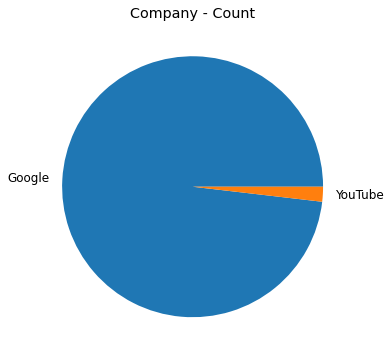

In [11]:
# Showing the above result as pie chart
plt.figure(figsize=(8, 6))
plt.pie(df['Company'].value_counts(), labels=df['Company'].value_counts().index)
plt.title('Company - Count')
plt.show()

## Job Posting Distribution based on Category

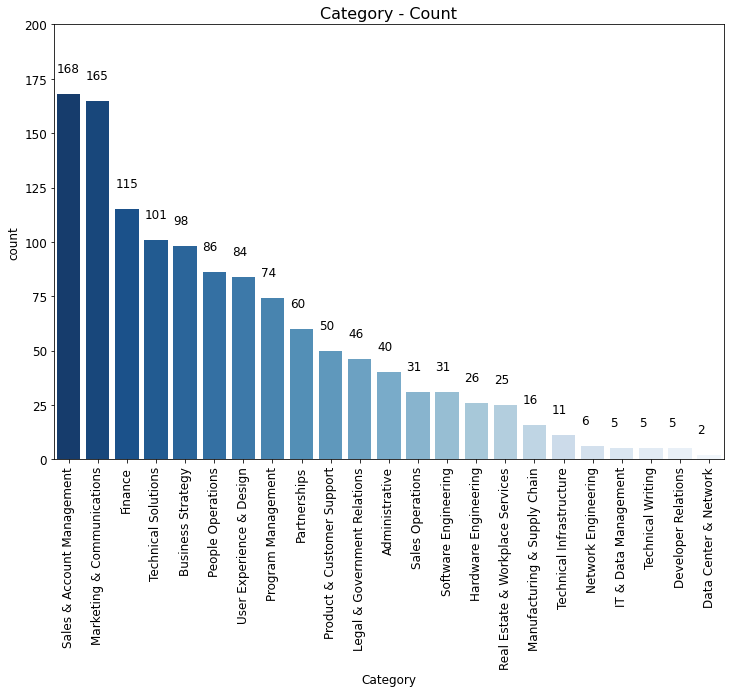

In [12]:
# Bar Chart for showing total category for which job is listed
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=df, x='Category', ax=ax, order=df['Category'].value_counts().index, palette='Blues_r')
ax.set_title('Category - Count', fontsize=16)
ax.set_ylim(0, 200)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 10))

## Job Posting Distribution based on Title

In [13]:
# Create a series for top 20 jobs by count
df_title = df['Title'].value_counts().head(20)

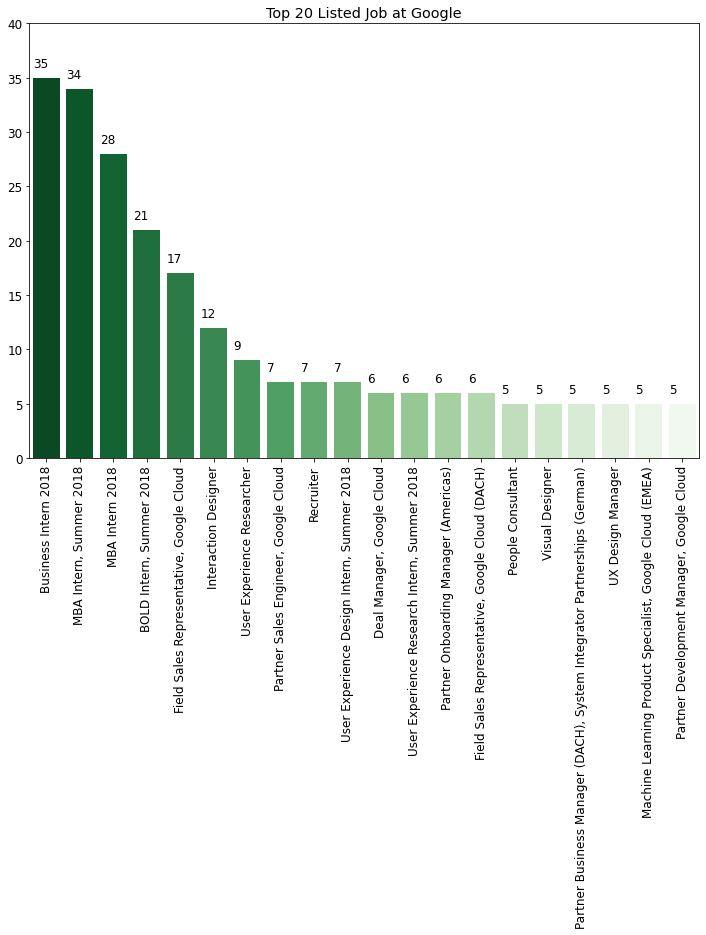

In [14]:
# Let's now find the top 20 most popular position by job title
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=df_title.index, y = df_title.values, ax=ax, palette='Greens_r')
ax.set_title('Top 20 Listed Job at Google')
ax.set_ylim(0, 40)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height() + 1))

## Extract Frequently Mentioned Qualifications

In [15]:
# Creating new column combining Preferred Qualifications and Minimum Qualifications
df['Overall Qualifications'] = df['Preferred Qualifications'] + ' ' + df['Minimum Qualifications']

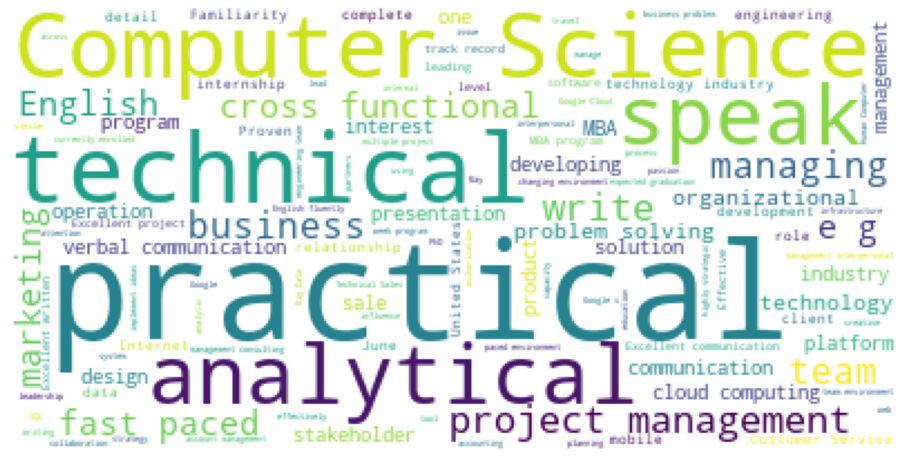

In [16]:
# Generate word cloud based on Overall Qualification
text = ''
for i in df['Overall Qualifications'].values:
    if isinstance(i, str):
        text = text + i + ' '

stopwords = set(STOPWORDS)
add_stopwords = ['Experience', 'experience', 'year', 'Master degree', 'e g', 'equivalent', 'strong', 
                'working', 'December', 'work', 'related field', 'relevant work', 'related field', 'skills', 
                'BS', 'BA', 'Ability', 'understanding', 'work experience', 'full time', 'years', 'relevant', 
                'degree', 'drive', 'idiomatically', 'graduation date', 'date', 'well', 'knowledge', 'including', 
                'able', 'Master', 'partner', 'etc', 'Demonstrated', 'demonstrated', 'related', 'field', 'full', 
                 'time', 'Bachelor', 'within', 'building']
stopwords.update(add_stopwords)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

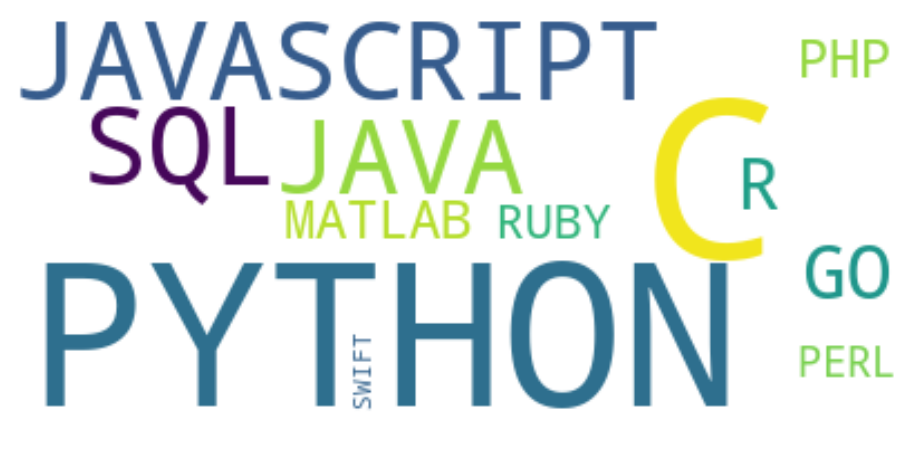

In [17]:
# Top 20 Programming Language (https://www.tiobe.com/tiobe-index/)
p_lang = ['C', 'JAVA', 'PYTHON', 'C++', 'C#', 'VISUAL BASIC', 'JAVASCRIPT', 'PHP', 
         'ASSEMBLY LANGUAGE', 'SQL', 'VISUAL BASIC', 'R', 'GO', 'FORTRAN', 'GROOVY', 
         'SWIFT', 'RUBY', 'PERL', 'MATLAB', 'DELPHI/OBJECT PASCAL']
p_dict = {k: 0 for k in p_lang}
for i in df['Overall Qualifications'].values:
    if isinstance(i, str):
        text = i.upper()
        for j in re.split('\W+', text):
            if j in p_lang:
                p_dict[j] = p_dict[j] + 1

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(p_dict)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
def change2frac(dd):
    '''Function to convert count into fraction'''
    
    total = sum(list(dd.values()))
    new_dict = {k: v/total for k,v in dd.items()}
    new_df = pd.DataFrame(data = [new_dict.keys(), new_dict.values()], index=['Language', 'Fraction'])
    new_df = new_df.T
    new_df.sort_values(by=['Fraction'], inplace=True)
    return new_df

In [19]:
# Provide p_dict parameter to the chage2frac function
p_frac = change2frac(p_dict)

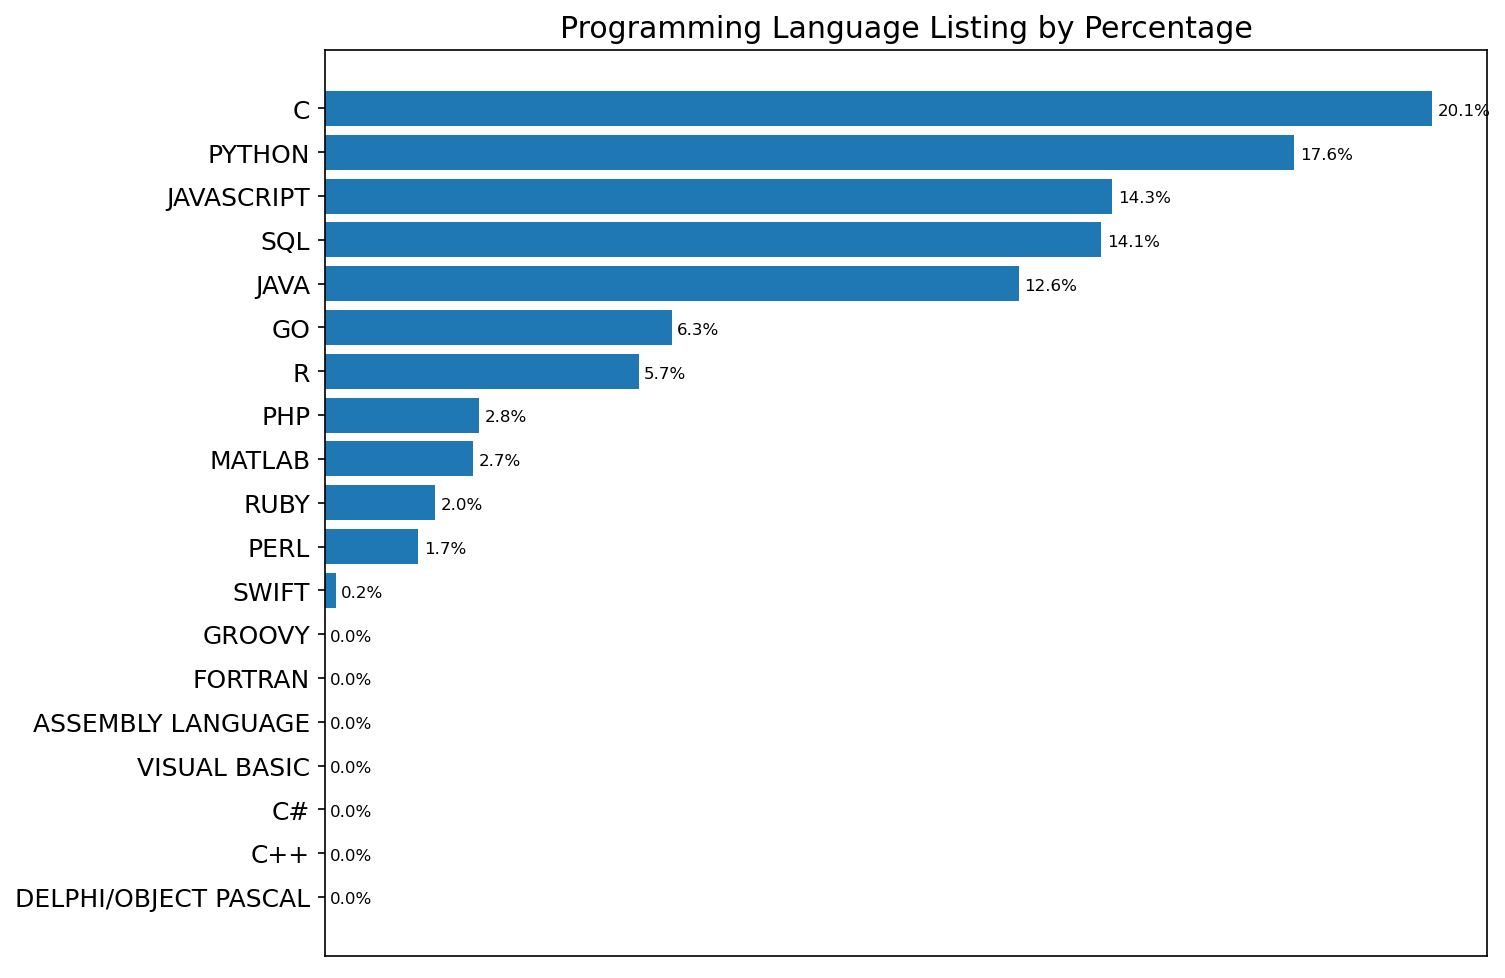

In [20]:
# Horizonta barplot showing distribution of programming langugages by percentage
plt.figure(figsize=(10, 8), dpi=150)
plt.barh(y=p_frac['Language'], width=p_frac['Fraction'])
plt.title('Programming Language Listing by Percentage')
plt.xticks([])
ax = plt.gca()
for p in ax.patches:
    ax.annotate('{:.1%}'.format(p.get_width()), (p.get_width() + 0.001, p.get_y() + 0.25), fontsize=8)